# Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/flight_data.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Preprocessing dataset

## Splitting Dataset into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2)

In [ ]:
pd.set_option('display.max_columns', None)

## Training

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1552,IndiGo,03/03/2019,Banglore,New Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info,8855
8577,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,19:50,13h 20m,1 stop,No info,14781
5803,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,23:30,02:20 22 Mar,2h 50m,non-stop,No info,4944
3615,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,18:15,04:25 10 May,10h 10m,1 stop,In-flight meal not included,12373
6066,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:00,13:20,6h 20m,1 stop,No info,9042


### Handeling null values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 1552 to 3024
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8546 non-null   object
 1   Date_of_Journey  8546 non-null   object
 2   Source           8546 non-null   object
 3   Destination      8546 non-null   object
 4   Route            8545 non-null   object
 5   Dep_Time         8546 non-null   object
 6   Arrival_Time     8546 non-null   object
 7   Duration         8546 non-null   object
 8   Total_Stops      8545 non-null   object
 9   Additional_Info  8546 non-null   object
 10  Price            8546 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 801.2+ KB


In [ ]:
train_data.dropna(inplace = True)

### EDA

In [ ]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
1552,IndiGo,03/03/2019,Banglore,New Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info,8855,3,3
8577,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,19:50,13h 20m,1 stop,No info,14781,9,5
5803,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,23:30,02:20 22 Mar,2h 50m,non-stop,No info,4944,24,3
3615,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,18:15,04:25 10 May,10h 10m,1 stop,In-flight meal not included,12373,9,5
6066,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:00,13:20,6h 20m,1 stop,No info,9042,21,3


In [ ]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

Departure time is when a plane leaves the gate.Similar to Date_of_Journey we can extract values from Dep_Time

In [ ]:
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
1552,IndiGo,Banglore,New Delhi,BLR → DEL,19:45,2h 50m,non-stop,No info,8855,3,3,16,55
8577,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,19:50,13h 20m,1 stop,No info,14781,9,5,6,30
5803,IndiGo,Banglore,New Delhi,BLR → DEL,02:20 22 Mar,2h 50m,non-stop,No info,4944,24,3,23,30
3615,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 10 May,10h 10m,1 stop,In-flight meal not included,12373,9,5,18,15
6066,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13:20,6h 20m,1 stop,No info,9042,21,3,7,0


Arrival time is when the plane pulls up to the gate. Similar to Date_of_Journey we can extract values from Arrival_Time

In [ ]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
1552,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,8855,3,3,16,55,19,45
8577,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,13h 20m,1 stop,No info,14781,9,5,6,30,19,50
5803,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,4944,24,3,23,30,2,20
3615,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 10m,1 stop,In-flight meal not included,12373,9,5,18,15,4,25
6066,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,6h 20m,1 stop,No info,9042,21,3,7,0,13,20


Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival time

In [ ]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

i=0
while(i<len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
    i+=1

duration_hours = []
duration_mins = []
i=0
while(i<len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    i+=1

Adding duration_hours and duration_mins list to train_data dataframe.

In [ ]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [ ]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1552,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,8855,3,3,16,55,19,45,2,50
8577,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,No info,14781,9,5,6,30,19,50,13,20
5803,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,4944,24,3,23,30,2,20,2,50
3615,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,12373,9,5,18,15,4,25,10,10
6066,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,9042,21,3,7,0,13,20,6,20


From graph we can see that Jet Airways Business have the highest Price. Apart from the first Airline almost all are having similar median

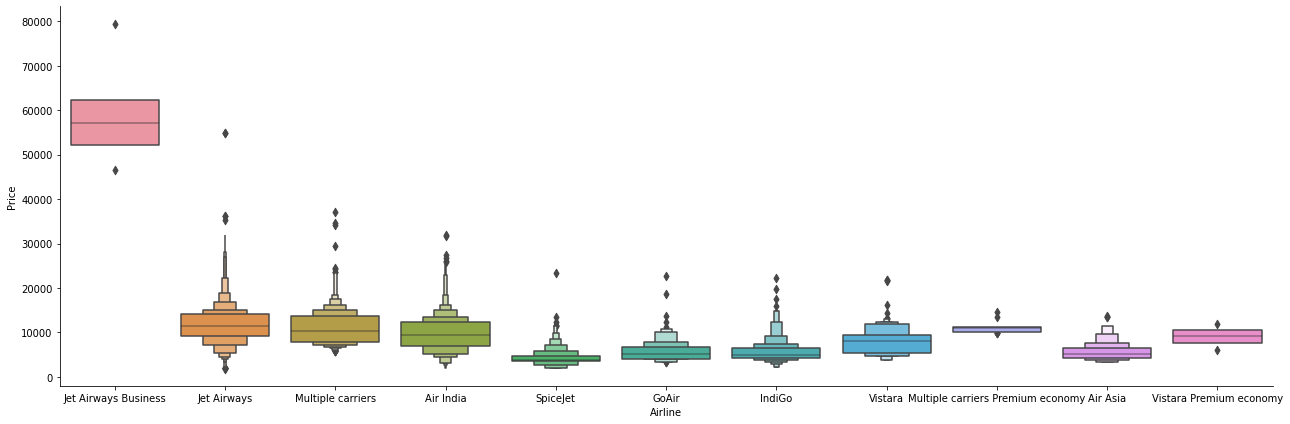

In [ ]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### Handeling Categorical Data

As Airline is Nominal Categorical data we will perform OneHotEncoding

In [ ]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
1552,0,0,1,0,0,0,0,0,0,0
8577,0,0,0,1,0,0,0,0,0,0
5803,0,0,1,0,0,0,0,0,0,0
3615,0,0,0,1,0,0,0,0,0,0
6066,0,0,0,0,0,1,0,0,0,0


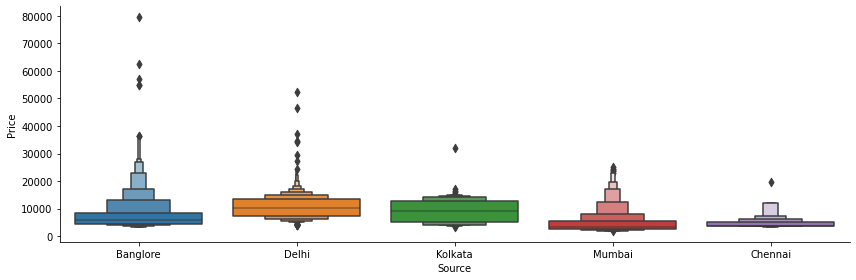

In [ ]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

As Source is Nominal Categorical data we will perform OneHotEncoding

In [ ]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
1552,0,0,0,0
8577,0,0,1,0
5803,0,0,0,0
3615,0,1,0,0
6066,0,1,0,0


As Destination is Nominal Categorical data we will perform OneHotEncoding.


In [ ]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1552,0,0,0,0,1
8577,0,0,0,0,0
5803,0,0,0,0,1
3615,1,0,0,0,0
6066,1,0,0,0,0


In [ ]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

As this is case of Ordinal Categorical type we perform LabelEncoder. Here Values are assigned with corresponding keys


In [ ]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1552,IndiGo,Banglore,New Delhi,0,8855,3,3,16,55,19,45,2,50
8577,Jet Airways,Kolkata,Banglore,1,14781,9,5,6,30,19,50,13,20
5803,IndiGo,Banglore,New Delhi,0,4944,24,3,23,30,2,20,2,50
3615,Jet Airways,Delhi,Cochin,1,12373,9,5,18,15,4,25,10,10
6066,Multiple carriers,Delhi,Cochin,1,9042,21,3,7,0,13,20,6,20


In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [ ]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1552,IndiGo,Banglore,New Delhi,0,8855,3,3,16,55,19,45,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8577,Jet Airways,Kolkata,Banglore,1,14781,9,5,6,30,19,50,13,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5803,IndiGo,Banglore,New Delhi,0,4944,24,3,23,30,2,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3615,Jet Airways,Delhi,Cochin,1,12373,9,5,18,15,4,25,10,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6066,Multiple carriers,Delhi,Cochin,1,9042,21,3,7,0,13,20,6,20,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1552,0,8855,3,3,16,55,19,45,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8577,1,14781,9,5,6,30,19,50,13,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5803,0,4944,24,3,23,30,2,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3615,1,12373,9,5,18,15,4,25,10,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6066,1,9042,21,3,7,0,13,20,6,20,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
data_train.shape

(8545, 29)

## Testing

In [ ]:
Y=test_data["Price"]
test_data=test_data.drop(columns=["Price"],axis=1)

In [ ]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info
503,Air India,6/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info
10154,IndiGo,18/05/2019,Delhi,Cochin,DEL → HYD → COK,05:05,12:10,7h 5m,1 stop,No info
2993,IndiGo,18/04/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info
9009,Jet Airways,3/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
8763,Jet Airways,18/04/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,No info
9266,Jet Airways,06/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,No info
10422,Multiple carriers,24/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info


### Handeling null values

In [ ]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 10383 to 9217
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2137 non-null   object
 1   Date_of_Journey  2137 non-null   object
 2   Source           2137 non-null   object
 3   Destination      2137 non-null   object
 4   Route            2137 non-null   object
 5   Dep_Time         2137 non-null   object
 6   Arrival_Time     2137 non-null   object
 7   Duration         2137 non-null   object
 8   Total_Stops      2137 non-null   object
 9   Additional_Info  2137 non-null   object
dtypes: object(10)
memory usage: 183.6+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time     

### EDA

In [ ]:

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

### Handeling Categorical Data

In [ ]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          770
IndiGo                               406
Air India                            359
Multiple carriers                    229
SpiceJet                             172
Vistara                               86
Air Asia                              66
GoAir                                 45
Multiple carriers Premium economy      2
Trujet                                 1
Jet Airways Business                   1
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       881
Kolkata     610
Banglore    427
Mumbai      138
Chennai      81
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       881
Banglore     610
Delhi        244
New Delhi    183
Hyderabad    138
Kolkata       81
Name: Destination, dtype: int64


Shape of test data : 

In [ ]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
10383,1,1,3,7,0,5,5,22,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
503,1,6,6,13,0,19,15,6,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10154,1,18,5,5,5,12,10,7,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2993,0,18,4,6,5,8,50,2,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9009,0,3,3,2,55,4,25,1,30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Visualization

### Count plots

Airlines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Airlines')

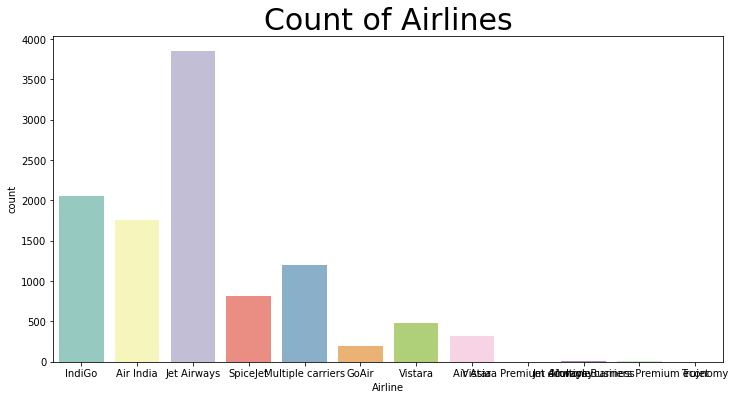

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)

Source

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Source')

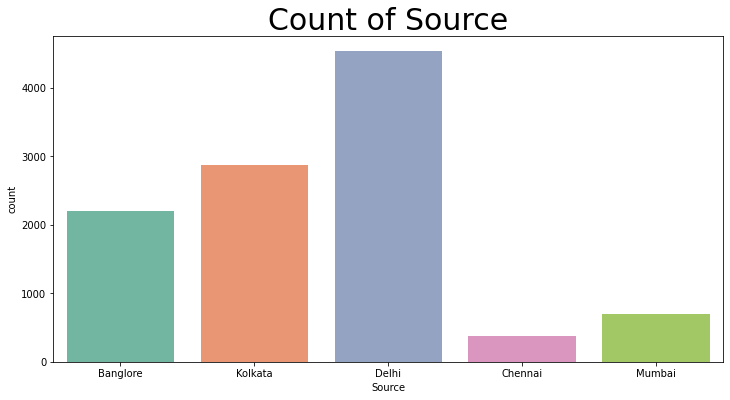

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Source'], palette='Set2')
plt.title('Count of Source', size=30)

Destination

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Destination')

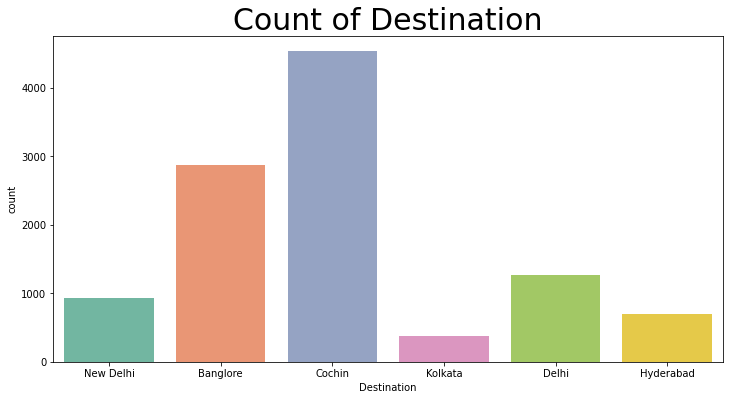

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Destination'], palette='Set2')
plt.title('Count of Destination', size=30)

Total stops

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of total stops')

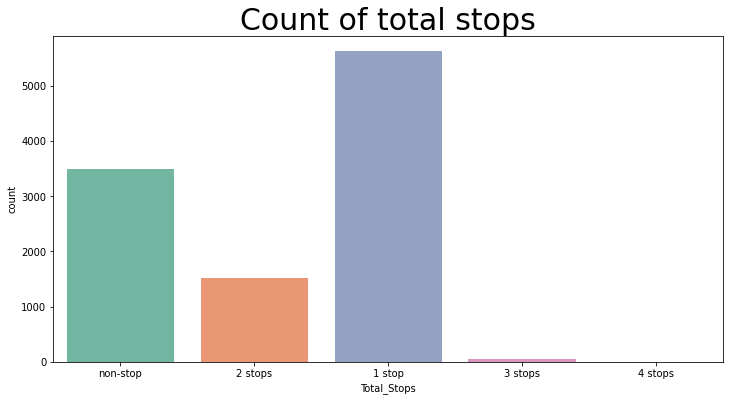

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Total_Stops'], palette='Set2')
plt.title('Count of total stops', size=30)

### feature-wise comparison plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


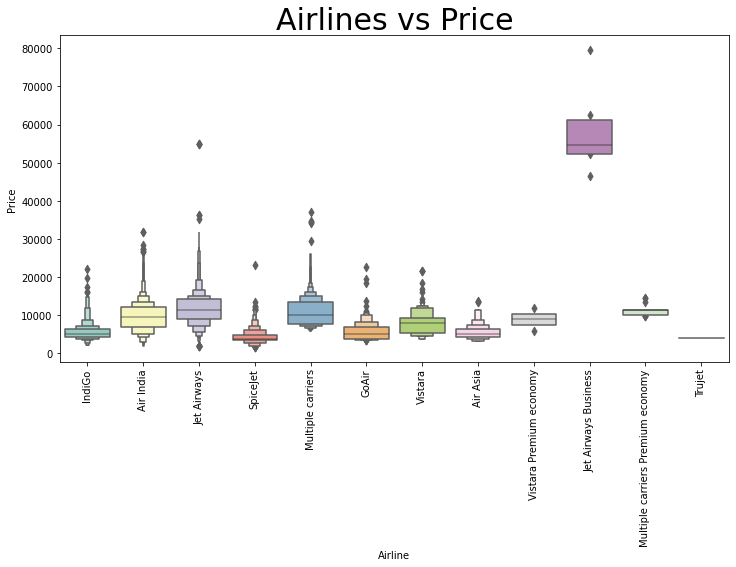

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Airline'], data['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


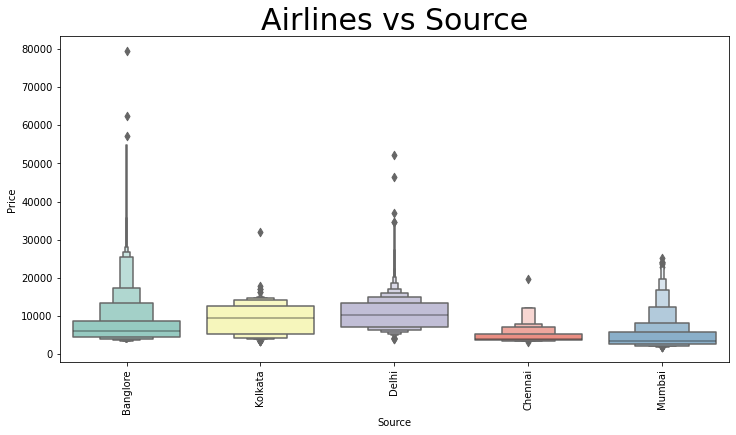

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Source'], data['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


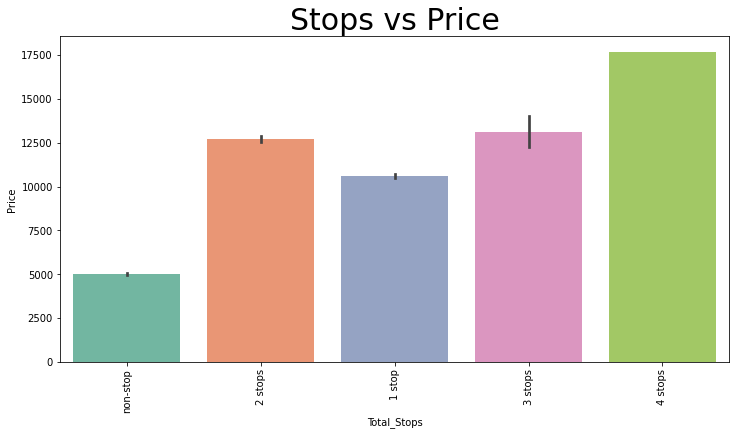

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data['Total_Stops'], data['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


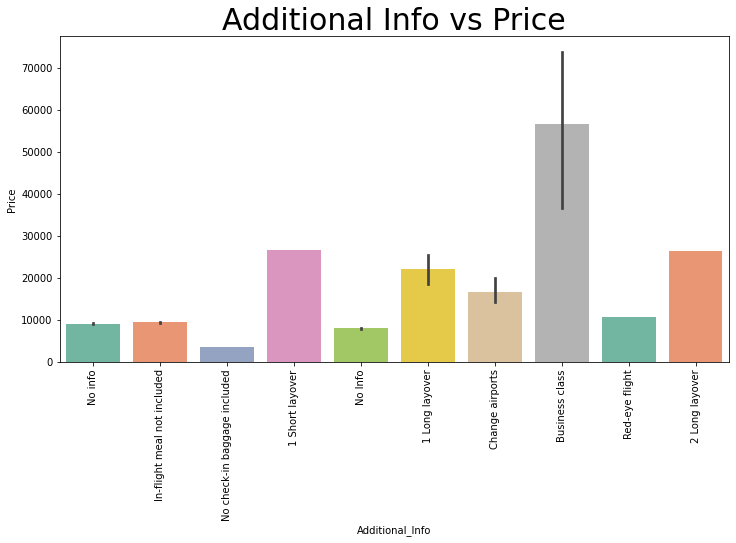

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data['Additional_Info'], data['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

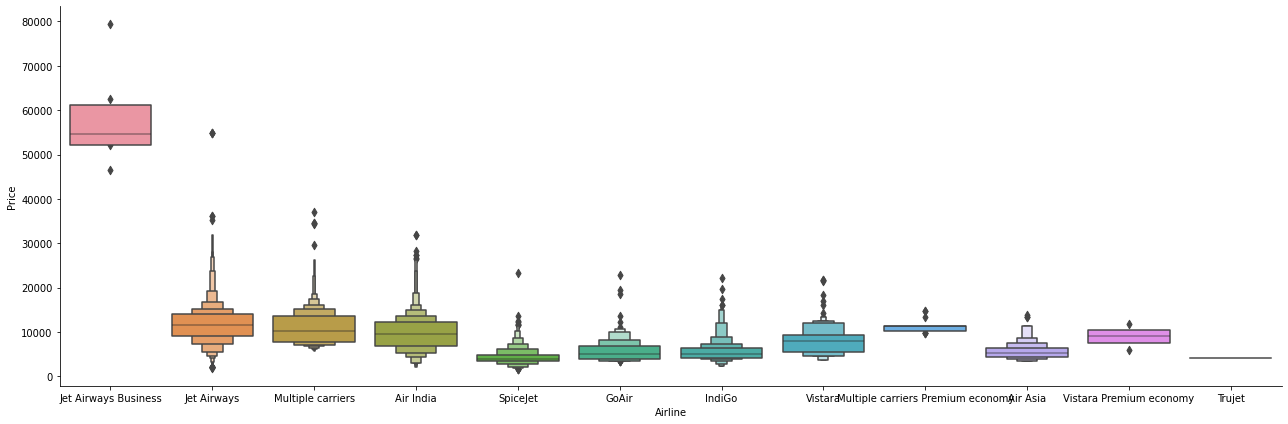

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Feature Extraction

In [ ]:
data_train.shape

(8545, 30)

In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8434,2,27,3,5,40,4,25,22,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1420,0,15,5,15,15,18,10,2,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
569,0,3,3,2,55,4,25,1,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5648,1,6,4,6,50,12,10,5,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8998,1,9,5,20,25,21,5,24,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y = data_train.iloc[:, 1]
y.head()

8434    12074
1420     3502
569      4050
5648     5298
8998    13067
Name: Price, dtype: int64

## correlation between Independent and dependent attributes

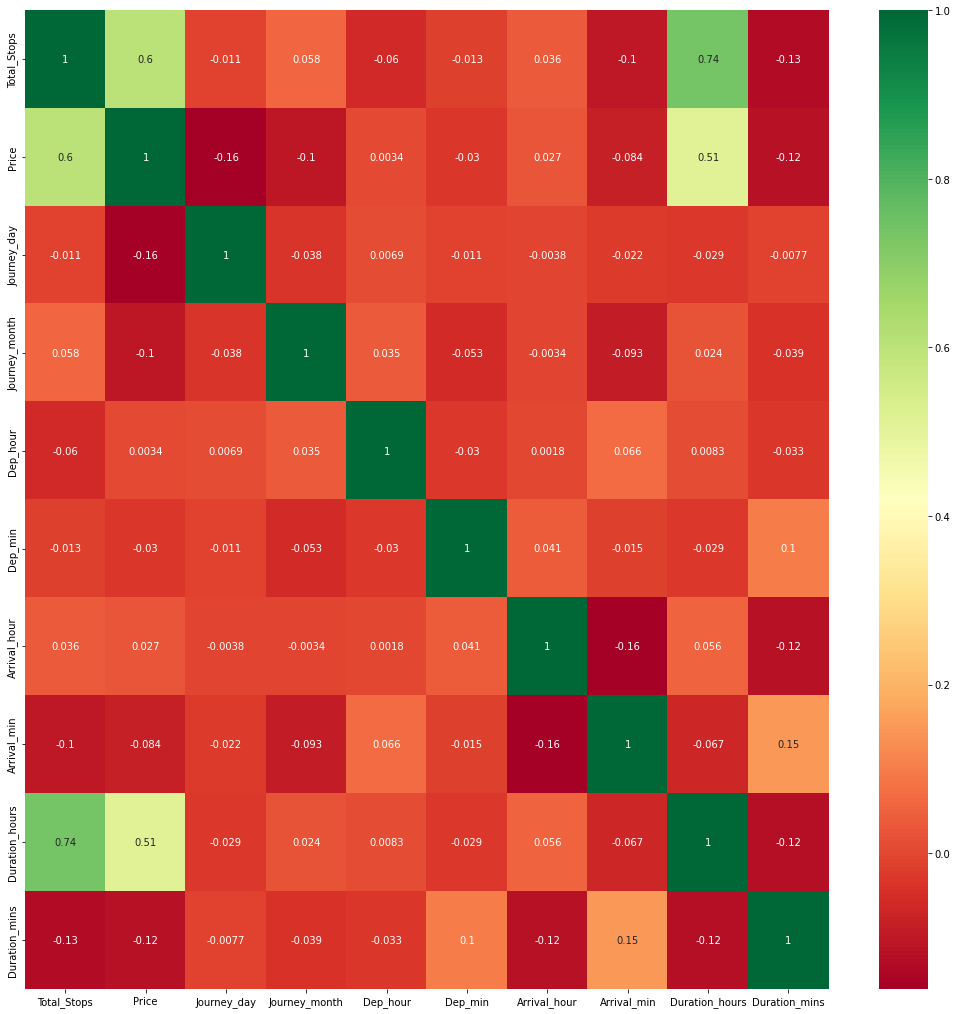

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Important feature using ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.45446452e-01 1.50061517e-01 5.35360722e-02 2.56130219e-02
 2.20590355e-02 2.60023663e-02 2.02000084e-02 1.17055486e-01
 1.85204949e-02 8.48578910e-03 1.67266029e-03 1.26988849e-02
 1.35492530e-01 5.82690428e-02 2.54236491e-02 8.87919587e-04
 2.47678718e-03 1.15934215e-04 4.97419156e-03 1.04649764e-04
 5.89346405e-04 6.35126829e-03 3.30580149e-03 7.18616030e-03
 7.45957057e-03 1.63289435e-02 5.95240356e-03 6.73953493e-04
 2.30560593e-02]


## plot graph of feature importances for better visualization

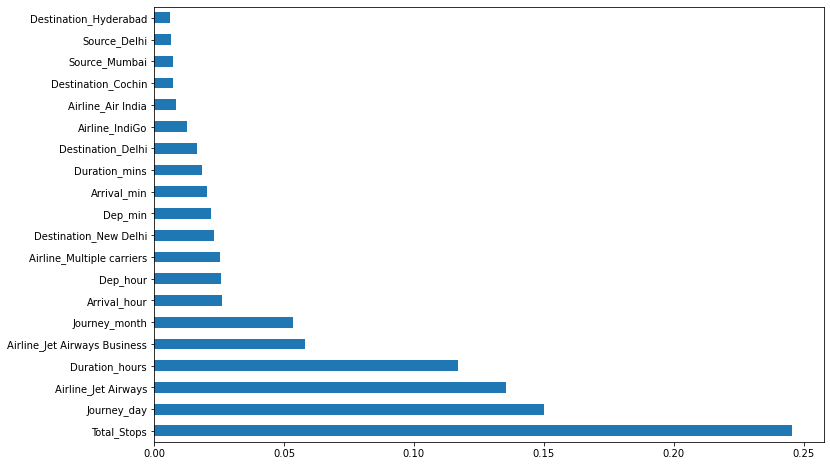

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
5261,0,6,5,13,15,14,45,1,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4219,0,15,6,21,5,23,55,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5705,1,9,6,9,50,21,5,11,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
819,1,12,6,18,55,20,45,25,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9117,0,18,5,19,50,22,50,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Model fitting

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.9572387228125866

In [ ]:
model.score(X_test, y_test)

0.7755785642905155

In [ ]:
r2_score(y_pred,y_test)

0.7228240928943113

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


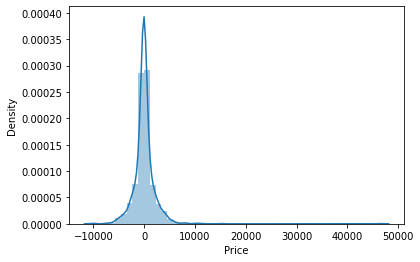

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

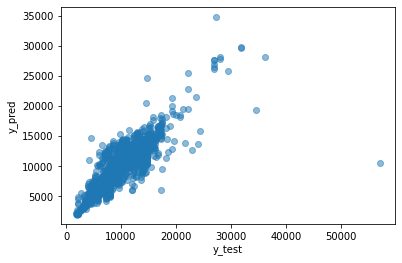

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
model2 = XGBRegressor()
model2.fit(X_train, y_train)

[11:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
model2.score(X_train, y_train)

0.776889456452595

In [ ]:
model2.score(X_test, y_test)

0.7839136009516697

In [ ]:
r2_score(y_pred2,y_test)

0.6767321671842139

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


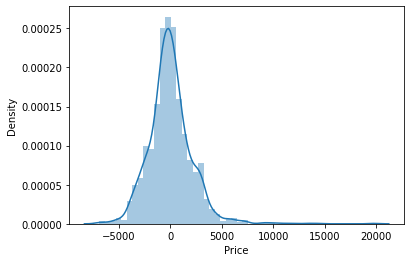

In [ ]:
sns.distplot(y_test-y_pred2)
plt.show()

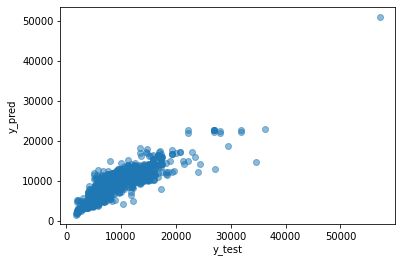

In [ ]:
plt.scatter(y_test, y_pred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Gradient Bossting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
model3.score(X_train, y_train)

0.7780316670425226

In [ ]:
model3.score(X_test, y_test)

0.7791856949441489

In [ ]:
r2_score(y_pred3,y_test)

0.658394553389198

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


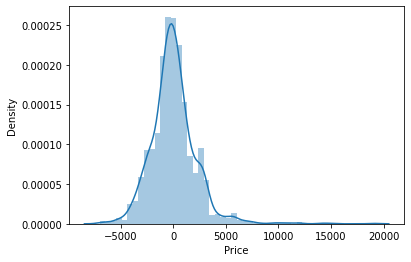

In [ ]:
sns.distplot(y_test-y_pred3)
plt.show()

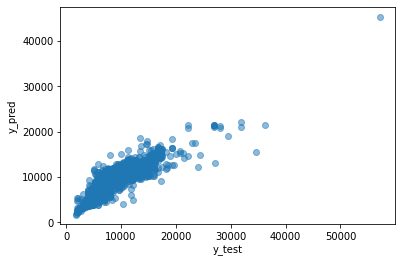

In [ ]:
plt.scatter(y_test, y_pred3, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Error

## Random Forest Regressor

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1184.043048770211
MSE: 4769415.8092949
RMSE: 2183.899221414509


In [ ]:
metrics.r2_score(y_test, y_pred)

0.7755785642905155

## XGBoost Regressor

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1519.6325200026743
MSE: 4592279.1846356485
RMSE: 2142.9603786901075


In [ ]:
metrics.r2_score(y_test, y_pred2)

0.7839136009516697

## Gradient Bossting Regressor

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1521.719786012029
MSE: 4692756.884485677
RMSE: 2166.277194748095


In [ ]:
metrics.r2_score(y_test, y_pred3)

0.7791856949441489

# Hyperparameter Tuning

## Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 200}

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(prediction,y_test)

0.7324922826688518

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


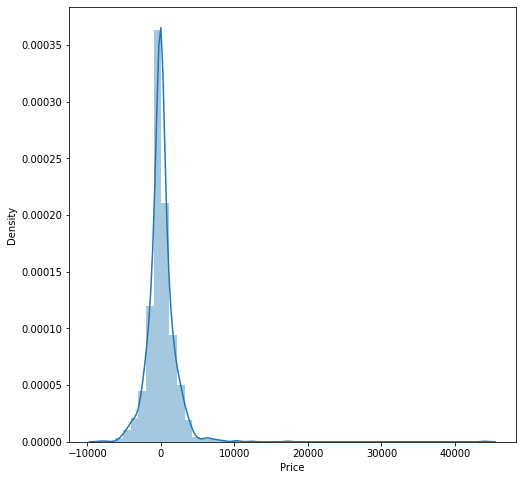

In [ ]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

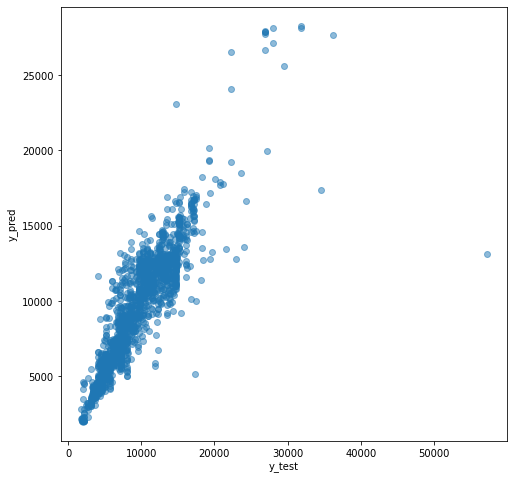

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1175.6346479992833
MSE: 4299204.280985399
RMSE: 2073.4522615641285


## XGBoost Regressor

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = RandomizedSearchCV(model2,params,cv=5)
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100}

In [ ]:
prediction2 = clf.predict(X_test)

In [ ]:
r2_score(prediction2,y_test)

0.8013368676373613

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


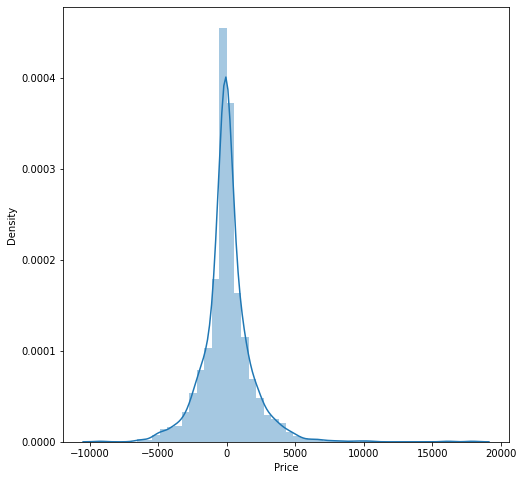

In [ ]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction2)
plt.show()

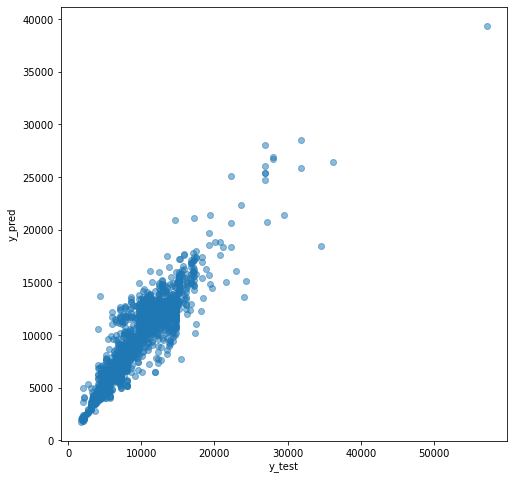

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

MAE: 1155.1073310186878
MSE: 3327141.846167631
RMSE: 1824.0454616504576


## Gradient Bossting Regressor

In [ ]:
param_grid2={'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4],'n_estimators':[100,50,10]}
gcv2=RandomizedSearchCV(model3,param_grid2,cv=3)
res2=gcv2.fit(X_train,y_train)  

In [ ]:
res2.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 50}

In [ ]:
prediction3 = res2.predict(X_test)

In [ ]:
r2_score(prediction3,y_test)

0.7230684055959197

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


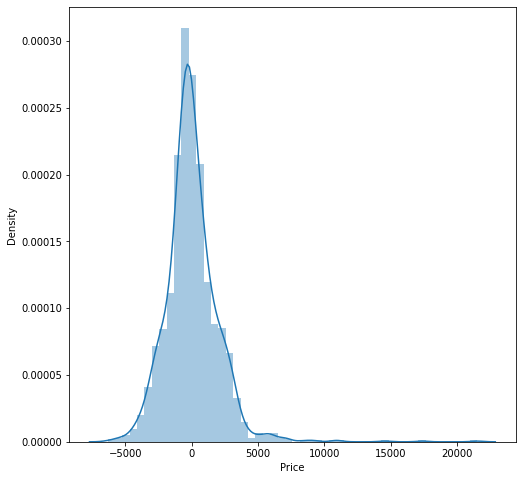

In [ ]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction3)
plt.show()

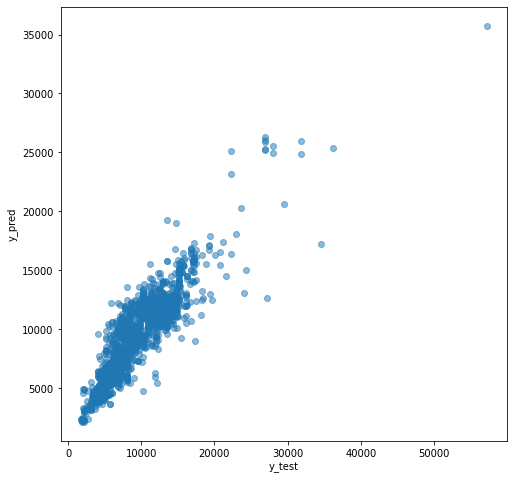

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction3, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction3))
print('MSE:', metrics.mean_squared_error(y_test, prediction3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction3)))

MAE: 1386.8341216506224
MSE: 4011269.234495676
RMSE: 2002.8153271072388


# Conclusion

In [ ]:
results_final=[['Random Forest',model.score(X_test, y_test),r2_score(prediction,y_test)],['XGBRegressor',model2.score(X_test, y_test),r2_score(prediction2,y_test)],['Gradient Boosting Regressor',model3.score(X_test, y_test),r2_score(prediction3,y_test)]]
results_final = pd.DataFrame(results_final, columns = ['Model', 'Before hyperparameter tuning','After hyperparameter tuning'])
results_final

,Model,Before hyperparameter tuning,After hyperparameter tuning
0,Random Forest,0.775579,0.732492
1,XGBRegressor,0.783914,0.801337
2,Gradient Boosting Regressor,0.779186,0.723068


In [ ]:
pd.DataFrame({'Actual': y_test,'Predicted': prediction2})

,Actual,Predicted
5545,11885,13198.924805
5882,7229,6244.392090
2227,10208,10117.266602
8046,14388,12921.280273
6415,15129,14791.814453
...,...,...
10262,13310,11844.927734
6605,27992,26722.603516
4834,5176,5080.341309
6202,7005,7948.652832
